In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import OneHotEncoder,StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [117]:
x=pd.read_csv("/content/BMW_Car_Sales_Classification.csv")

In [118]:
x.head(5)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [119]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [120]:
x=x.drop(columns=['Model','Year','Color','Region'],axis=1)

In [121]:
x.head(2)

,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,Petrol,Manual,3.5,151748,98740,8300,High
1,Hybrid,Automatic,1.6,121671,79219,3428,Low


In [122]:
cat=x.select_dtypes(include='object')
num=x.select_dtypes(exclude='object')

In [123]:
for i in cat.columns:
  print(i,cat[i].unique())

Fuel_Type ['Petrol' 'Hybrid' 'Diesel' 'Electric']
Transmission ['Manual' 'Automatic']
Sales_Classification ['High' 'Low']


In [124]:
x.isnull().sum()

,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0
Sales_Classification,0


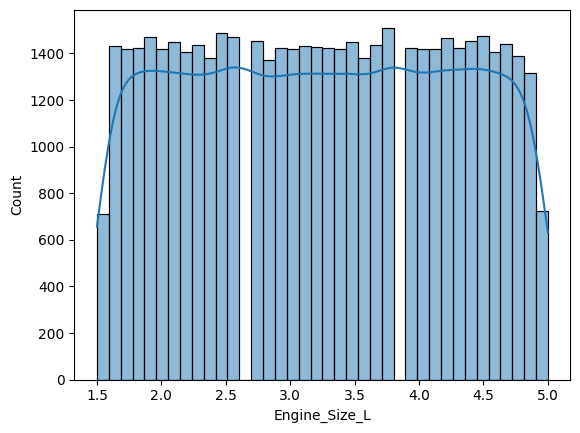

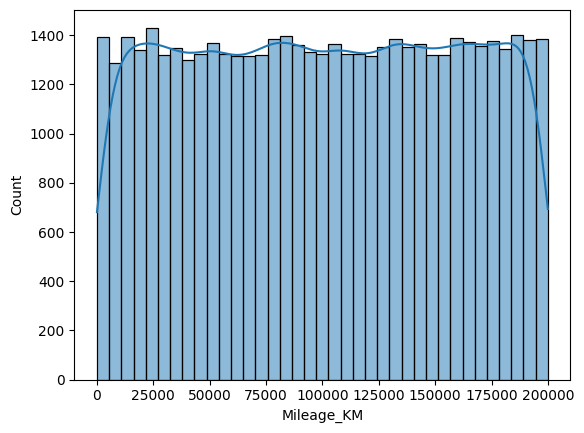

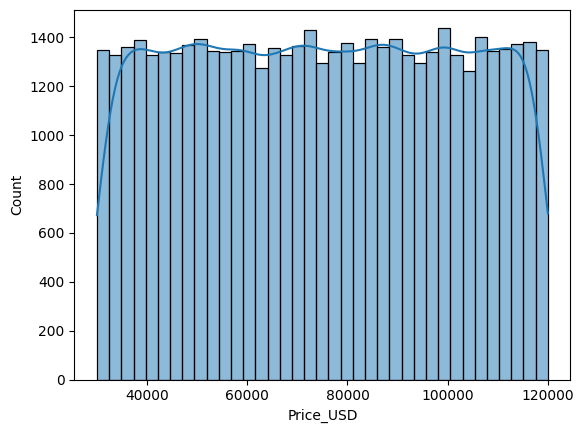

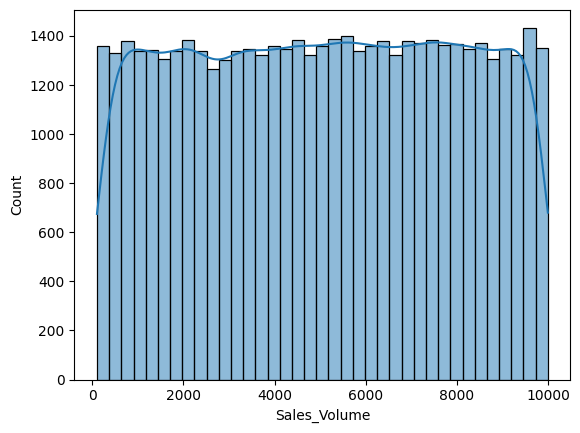

In [125]:
for i in num.columns:
  sns.histplot(x[i],kde=True)
  plt.show()

In [126]:
sc=StandardScaler()
oe=OneHotEncoder()
le=LabelEncoder()


In [127]:
for i in num.columns:
    x[i]=sc.fit_transform(x[[i]])

In [128]:
x.head(5)

,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,Petrol,Manual,0.250548,0.887814,0.911817,1.131530,High
1,Hybrid,Automatic,-1.632377,0.368717,0.160951,-0.573911,Low
2,Petrol,Automatic,1.241561,-1.541504,1.470514,0.674365,Low
3,Petrol,Automatic,-1.533276,-1.260805,-0.540950,-0.357231,Low
4,Diesel,Manual,-1.136871,0.376656,-0.966867,-0.695729,Low


In [129]:

for i in cat.columns:
    if i != 'Fuel_Type':
        x[i]=oe.fit_transform(x[[i]]).toarray()

In [130]:
x.head(1)

,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,Petrol,0.0,0.250548,0.887814,0.911817,1.13153,1.0


In [137]:
x['Fuel_Type']=le.fit_transform(x['Fuel_Type'])

In [138]:

x.head(5)

,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,3,0.0,0.250548,0.887814,0.911817,1.131530,1
1,2,1.0,-1.632377,0.368717,0.160951,-0.573911,0
2,3,1.0,1.241561,-1.541504,1.470514,0.674365,0
3,3,1.0,-1.533276,-1.260805,-0.540950,-0.357231,0
4,0,0.0,-1.136871,0.376656,-0.966867,-0.695729,0


Sales=High-1
      low-0

fuel_type=Petrol=3
          Diseal=0
          hybrid=2
          electric=1

transmission=manual-0
             automatic=1
             

In [139]:
fea=x.drop(columns=['Sales_Classification'])
tar=x['Sales_Classification']

In [140]:
xtr,xte,ytr,yte=train_test_split(fea,tar,test_size=0.25)

In [146]:
model=XGBClassifier(booster='gbtree',max_depth=9,n_estimators=50,random_state=80)

In [147]:
model.fit(xtr,ytr)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [148]:
pred=model.predict(xte)
accu=accuracy_score(yte,pred)
print(accu)

0.99816


In [151]:
pred1=np.array([3,0,0.25,.88,0.91,1.13])
preddd=model.predict(pred1.reshape(1,-1))

if(preddd==1):
  print("high sales")
else:
  print("low sale")

high sales
